In [2]:
import numpy as np
import pandas as pd
import sys
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [3]:
## Looking at Putirka and overlaps,
# Uses Alongso, Barclay, Moore and Carmichael, 1998, 
# Actually more of these they dont use, e.g. dont use Nandekar, Costa, Bogarents, but keep for consistency. 


In [4]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels


## We are looking at zhang

In [5]:
cali_zhang=pt.return_cali_dataset(model="Zhang2017")#

In [6]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Amp-Liq')
myAmps1=out['Amps']
myLiquids1=out['Liqs']
Amp_Glass=out['my_input']

# Use KD filter
liq_comps_hy = pt.calculate_hydrous_cat_fractions_liquid(liq_comps=myLiquids1)
MolProp=pt.calculate_mol_proportions_amphibole(amp_comps=myAmps1)
Kd=((MolProp['FeOt_Amp_mol_prop']/MolProp['MgO_Amp_mol_prop'])/
(liq_comps_hy['FeOt_Liq_mol_frac_hyd']/liq_comps_hy['MgO_Liq_mol_frac_hyd']))
        
Mgno_hyd=pt.calculate_amp_liq_mgno_hyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)
Mgno_anhyd=pt.calculate_amp_liq_mgno_anhyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)

Cali=( (Amp_Glass['Citation_x']=='Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8')
        |
       (Amp_Glass['Citation_x']=='Barclay, J., Carmichael, I.S.E. (2004) A hornblende basalt from western Mexico: water-saturated phase relations constrain a pressure-temperature window of eruptibility. Journal of Petrology 45 485-506. 10.1093/petrology/egg091')
        |
       (Amp_Glass['Citation_x']=='Bogaerts2006_notinLEPR')
        |       
       (Amp_Glass['Citation_x']=='Costa2004_notinLEPR')
        |
       (Amp_Glass['Citation_x']=='Moore, G., and Carmichael, I.S.E. (1998) The hydrous phase equilibria (to 3 kbar) of an andesite and basaltic andesite from western Mexico: constraints on water content and conditions of phenocryst growth. Contributions to Mineralogy and Petrology 130 304-319. 10.1007/s004100050367')
        |  
       (Amp_Glass['Citation_x']=='Nandekar2014_notinLEPR')
        |  
       (Amp_Glass['Citation_x'].str.startswith('Sisson, T.W., Grove, T.L. (1993)'))
      |      
      (Amp_Glass['Citation_x'].str.startswith('Pichavant, M., Martel, C., Bourdier, J.-L., Scaillet, B. (2002)'))
     )
        
KdFilt=(Kd>(0.28-0.11)) & (Kd<(0.28+0.11))
# notinKeith=(Amp_Glass['Citation_x']=='Mercer, C.N., and w3Johnston, A.D. (2008)')|(Amp_Glass['Citation_x']=='Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)')
# newMask=notinLEPR|notinKeith
# newMask=newMask.fillna(False)
# Eq_mask=abs(0.28-Mgno_anhyd)<0.11
# mask_1GPa=Amp_Glass['P_kbar_x']<13
# mask_1GPa=mask_1GPa.fillna(False)

# Press_new=mask_1GPa&newMask
# Press_new=Press_new.fillna(False)
Amp_Glass_Filt=Amp_Glass.loc[(~Cali)&KdFilt].reset_index(drop=True)
Amp_Filt=myAmps1.loc[(~Cali)&KdFilt].reset_index(drop=True)

In [7]:
len(Amp_Filt)

133

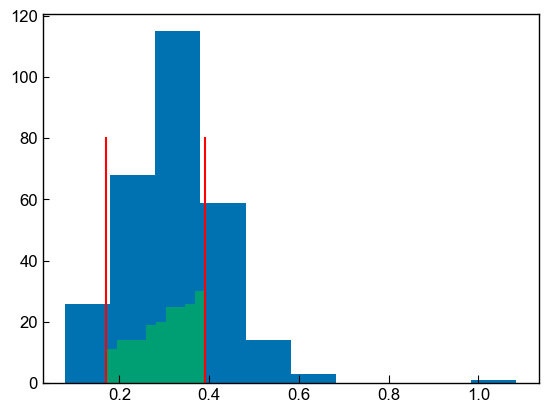

In [8]:
plt.hist(Kd)
plt.hist(Kd[KdFilt])
plt.plot([0.28-0.11,0.28-0.11], [0, 80], '-r')
plt.plot([0.28+0.11,0.28+0.11], [0, 80], '-r')

In [9]:
CalcP=pt.calculate_amp_only_press_temp(amp_comps=Amp_Filt,
                                equationP="P_Ridolfi2021", equationT="T_Ridolfi2012")


c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [10]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Amp_Filt, T=CalcP['T_K_calc'])

c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users

In [11]:
Amp_Chem.head()

,SiO2_Eq10_Put2016,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,SiO2_Eq3_Zhang17,FeO_Eq7_Zhang17,TiO2_Eq5_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,Al2O3_Eq14_Zhang17,H2O_Ridolfi21,deltaNNO_Ridolfi21,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A,Ca_A,Sum_T,Sum_C,Sum_B,Sum_A,factor_8SiAl,factor_15eK,factor_13eCNK,All ferric,8Si_Min,16CAT_Min,15eNK_Min,Min_MinFactor,Min_factor,Max_factor,Av_factor,Si_T_ideal,Al_IV_T_ideal,Ti_T_ideal,Al_VI_C_ideal,Ti_C_ideal,Cr_C_ideal,Fe3_C_ideal,Mg_C_ideal,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,NaN,64.114127,63.562596,67.944551,0.767767,NaN,3.161734,NaN,1.222168,5.546058,4.496680,1.547302,1.414568,15.755501,4.131708,2.427528,6.761535,3.946457,0.915854,1.554656,1.543709,0.550235,0.061269,0.011094,0.190478,0.031066,0.0,13.400192,14.954848,15.566352,0.811642,6.761535,1.238465,0.305244,0.190478,3.946457,0.526756,0.0,0.031066,0.0,0.389098,0.011094,0.045152,1.554656,0.505083,0.061269,0,8.0,4.809522,2.000000,0.566352,0.963247,0.967425,0.869283,0.980479,1.183163,1.027858,1.003019,1.003019,1.000000,0.980479,0.990239,6.695538,1.304462,0,0.224180,0.188619,0.030763,0.448988,3.907937,0.199515,0.0,0,0.258412,0.010986,1.539482,0.191120,0.353744,0.060671,2.784101
1,NaN,60.690157,61.714151,61.914639,0.931539,NaN,3.597119,NaN,1.707302,6.016133,4.811604,2.646156,2.245399,16.666478,4.777554,1.512072,6.400435,3.474433,1.035939,1.794054,1.883246,0.658991,0.080714,0.011216,0.312104,0.043040,0.0,13.160412,14.954467,15.694171,0.770321,6.400435,1.599565,0.283680,0.312104,3.474433,0.886743,0.0,0.043040,0.0,0.149196,0.011216,0.045533,1.794054,0.613457,0.080714,0,8.0,4.687896,2.000000,0.694171,0.965754,0.960710,0.869305,0.977976,1.249915,1.019487,1.003045,1.003045,1.000000,0.977976,0.988988,6.329952,1.670048,0,0.192459,0.308667,0.042566,0.506561,3.436172,0.513575,0.0,0,0.004394,0.011093,1.774298,0.210215,0.441519,0.079825,3.690631
2,NaN,65.476031,65.160655,65.292628,0.619615,NaN,2.697976,NaN,1.354839,5.595972,4.324361,1.905191,2.021469,16.087764,4.997474,2.764301,6.613197,3.768733,0.993327,1.773793,1.627386,0.592402,0.073085,0.012442,0.218776,0.009291,0.0,13.243152,15.016945,15.682432,0.791408,6.613197,1.386803,0.240583,0.218776,3.768733,0.762617,0.0,0.009291,0.0,0.230710,0.012442,0.000000,1.773793,0.592402,0.073085,0,8.0,4.781224,2.016945,0.665487,0.970805,0.960963,0.865689,0.978862,1.209702,1.020250,0.998872,0.998872,0.998872,0.978862,0.988867,6.539572,1.460428,0,0.148841,0.216341,0.009187,0.512118,3.726775,0.386738,0.0,0,0.083412,0.012304,1.754046,0.150239,0.435568,0.072271,2.716168
3,60.987448,62.033334,61.483470,62.358282,0.840625,62.293947,3.765263,0.824177,1.792803,5.953277,5.222316,1.838573,1.944224,16.954538,5.088310,1.883305,6.431848,3.522657,1.059455,1.747608,1.918872,0.642720,0.071106,0.016151,0.263690,0.018554,0.0,13.231227,14.978836,15.692662,0.768785,6.431848,1.568152,0.350721,0.263690,3.522657,0.844379,0.0,0.018554,0.0,0.215076,0.016151,0.021164,1.747608,0.621555,0.071106,0,8.0,4.736310,2.000000,0.692662,0.958001,0.960212,0.867891,0.977487,1.243810,1.019585,1.001413,1.001413,1.000000,0.977487,0.988743,6.359448,1.640552,0,0.256720,0.260722,0.018345,0.517802,3.483004,0.463408,0.0,0,0.066320,0.015969,1.727936,0.189775,0.445710,0.070306,3.753739
4,NaN,78.570991,76.172790,78.352355,0.226342,NaN,1.661133,NaN,0.276711,2.757723,1.970347,1.595629,2.306780,13.510342,10.702270,6.119374,7.082282,3.480564,1.785097,1.462146,1.132943,0.311108,0.022536,0.000000,0.120696,0.000000,0.0,13.601582,15.063728,15.397372,0.660993,7.082282,0.917718,0.215225,0.120696,3.480564,1.183515,0.0,0.000000,0.0,0.601582,0.000000,0.0000

In [12]:
len(Amp_Glass_Filt)

133

In [13]:
Amp_Glass_Filt['Citation_x'].unique()
# Overlap with their test, Blatter, Barclay, Grove same,
# New, Kawomoto, Munter, Kraw, Berndt, Feig, Pichavent 2007, Mandler, Blatter, 2013, Melelk, 
#Ulmer, Almeev, Ruterhford1985, andujar, cadoux, riker, Parat, Sisson 2005

array(['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
     

In [14]:
len(Amp_Glass_Filt[(Amp_Glass_Filt['Citation_x']=="Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6"
                       )
                      |
                       (Amp_Glass_Filt['Citation_x']=="Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856"
                       )
                       |
                       (Amp_Glass_Filt['Citation_x']=="Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake volcano, N. California. Contributions to Mineralogy and Petrology 127 205-223. 10.1007/s004100050276")
                      ])

10

In [15]:
len(Amp_Glass_Filt)-10

123

In [16]:
Sites=pt.get_amp_sites_from_input(amp_comps=Amp_Filt)
Cali_Zhang=pt.return_cali_dataset(model="Zhang2017")
Cali_Put=pt.return_cali_dataset(model="Putirka2016")

c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [17]:
len(Amp_Glass_Filt['SiO2_Liq'])

133

## Liq  Calculating statistics for these all

In [18]:
R2_Zhang_Eq1=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq1_Zhang17'], xy=False, df=True)
R2_Zhang_Eq1.insert(0, 'Equation', 'Zhang17 Eq1: SiO$_2$')
# print('Eq 1 Zhang')
# print('R2='+str(R2_Zhang_Eq1['R2']))
# print('RMSE='+str(R2_Zhang_Eq1['RMSE']))
# print('Grad='+str(R2_Zhang_Eq1['Grad']))
# print('Int='+str(R2_Zhang_Eq1['Int']))
# print('Mean='+str(R2_Zhang_Eq1['Mean']))
print(R2_Zhang_Eq1)

               Equation    R2  RMSE  P_val  Median  Mean   Int  Grad
0  Zhang17 Eq1: SiO$_2$  0.68   4.9    0.0   -0.06 -1.08  1.33  0.96


In [19]:
type(R2_Zhang_Eq1)

pandas.core.frame.DataFrame

In [20]:
# Best one
R2_Zhang_Eq2=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq2_Zhang17'], xy=False, df=True)
R2_Zhang_Eq2.insert(0, 'Equation', 'Zhang17 Eq2: SiO$_2$')
# print('Eq 2 Zhang')
# print('R2='+str(R2_Zhang_Eq2['R2']))
# print('RMSE='+str(R2_Zhang_Eq2['RMSE']))
# print('Grad='+str(R2_Zhang_Eq2['Grad']))
# print('Int='+str(R2_Zhang_Eq2['Int']))
# print('Mean='+str(R2_Zhang_Eq2['Mean']))
R2_Zhang_Eq2

,Equation,R2,RMSE,P_val,Median,Mean,Int,Grad
0,Zhang17 Eq2: SiO$_2$,0.69,5.43,0.0,-0.04,-1.34,-6.98,1.08


In [21]:
R2_Zhang_Eq3=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq3_Zhang17'],  xy=False, df=True)
R2_Zhang_Eq3.insert(0, 'Equation', 'Zhang17 Eq3: SiO$_2$')
# print('Eq 3 Zhang')
# print('R2='+str(R2_Zhang_Eq3['R2']))
# print('RMSE='+str(R2_Zhang_Eq3['RMSE']))
# print('Grad='+str(R2_Zhang_Eq3['Grad']))
# print('Int='+str(R2_Zhang_Eq3['Int']))
# print('Mean='+str(R2_Zhang_Eq3['Mean']))

In [22]:
R2_Zhang_Eq4=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq4_Zhang17'],  xy=False, df=True)
R2_Zhang_Eq4.insert(0, 'Equation', 'Zhang17 Eq4: SiO$_2$')
# print('Eq 4 Zhang')
# print('R2='+str(R2_Zhang_Eq4['R2']))
# print('RMSE='+str(R2_Zhang_Eq4['RMSE']))
# print('Grad='+str(R2_Zhang_Eq4['Grad']))
# print('Int='+str(R2_Zhang_Eq4['Int']))
# print('Mean='+str(R2_Zhang_Eq4['Mean']))

In [23]:
R2_Zhang_Eq5=pt.calculate_R2(Amp_Glass_Filt['TiO2_Liq'], Amp_Chem['TiO2_Eq5_Zhang17'],  xy=False, df=True)
R2_Zhang_Eq5.insert(0, 'Equation', 'Zhang17 Eq5: TiO$_2$')
# print('Eq 5 Zhang')
# print('R2='+str(R2_Zhang_Eq5['R2']))
# print('RMSE='+str(R2_Zhang_Eq5['RMSE']))
# print('Grad='+str(R2_Zhang_Eq5['Grad']))
# print('Int='+str(R2_Zhang_Eq5['Int']))
# print('Mean='+str(R2_Zhang_Eq5['Mean']))

In [24]:
R2_Zhang_Eq6=pt.calculate_R2(Amp_Glass_Filt['TiO2_Liq'], Amp_Chem['TiO2_Eq6_Zhang17'],xy=False, df=True)
R2_Zhang_Eq6.insert(0, 'Equation', 'Zhang17 Eq6: TiO$_2$')
# print('Eq 6 Zhang')
# print('R2='+str(R2_Zhang_Eq6['R2']))
# print('RMSE='+str(R2_Zhang_Eq6['RMSE']))
# print('Grad='+str(R2_Zhang_Eq6['Grad']))
# print('Int='+str(R2_Zhang_Eq6['Int']))
# print('Mean='+str(R2_Zhang_Eq6['Mean']))

In [25]:
R2_Zhang_Eq7=pt.calculate_R2(Amp_Glass_Filt['FeOt_Liq'], Amp_Chem['FeO_Eq7_Zhang17'], xy=False, df=True)
R2_Zhang_Eq7.insert(0, 'Equation', 'Zhang17 Eq7: FeO$_t$')
# print('Eq 7 Zhang')
# print('R2='+str(R2_Zhang_Eq7['R2']))
# print('RMSE='+str(R2_Zhang_Eq7['RMSE']))
# print('Grad='+str(R2_Zhang_Eq7['Grad']))
# print('Int='+str(R2_Zhang_Eq7['Int']))
# print('Mean='+str(R2_Zhang_Eq7['Mean']))

In [26]:
R2_Zhang_Eq8=pt.calculate_R2(Amp_Glass_Filt['FeOt_Liq'], Amp_Chem['FeO_Eq8_Zhang17'], xy=False, df=True)
R2_Zhang_Eq8.insert(0, 'Equation', 'Zhang17 Eq8: MgO')
# print('Eq 8 Zhang')
# print('R2='+str(R2_Zhang_Eq8['R2']))
# print('RMSE='+str(R2_Zhang_Eq8['RMSE']))
# print('Grad='+str(R2_Zhang_Eq8['Grad']))
# print('Int='+str(R2_Zhang_Eq8['Int']))
# print('Mean='+str(R2_Zhang_Eq8['Mean']))

In [27]:
R2_Zhang_Eq9=pt.calculate_R2(Amp_Glass_Filt['MgO_Liq'], Amp_Chem['MgO_Eq9_Zhang17'], xy=False, df=True)
R2_Zhang_Eq9.insert(0, 'Equation', 'Zhang17 Eq9: MgO')

# print('Eq 9 Zhang')
# print('R2='+str(R2_Zhang_Eq9['R2']))
# print('RMSE='+str(R2_Zhang_Eq9['RMSE']))
# print('Grad='+str(R2_Zhang_Eq9['Grad']))
# print('Int='+str(R2_Zhang_Eq9['Int']))
# print('Mean='+str(R2_Zhang_Eq9['Mean']))

In [28]:
R2_Zhang_Eq10=pt.calculate_R2(Amp_Glass_Filt['CaO_Liq'], Amp_Chem['CaO_Eq10_Zhang17'], xy=False, df=True)
R2_Zhang_Eq10.insert(0, 'Equation', 'Zhang17 Eq10: CaO')

# print('Eq 10 Zhang')
# print('R2='+str(R2_Zhang_Eq10['R2']))
# print('RMSE='+str(R2_Zhang_Eq10['RMSE']))
# print('Grad='+str(R2_Zhang_Eq10['Grad']))
# print('Int='+str(R2_Zhang_Eq10['Int']))
# print('Mean='+str(R2_Zhang_Eq10['Mean']))

In [29]:
R2_Zhang_Eq11=pt.calculate_R2(Amp_Glass_Filt['CaO_Liq'], Amp_Chem['CaO_Eq11_Zhang17'], xy=False, df=True)
R2_Zhang_Eq11.insert(0, 'Equation', 'Zhang17 Eq11: CaO')

# print('Eq 11 Zhang')
# print('R2='+str(R2_Zhang_Eq11['R2']))
# print('RMSE='+str(R2_Zhang_Eq11['RMSE']))
# print('Grad='+str(R2_Zhang_Eq11['Grad']))
# print('Int='+str(R2_Zhang_Eq11['Int']))
# print('Mean='+str(R2_Zhang_Eq11['Mean']))

In [30]:
R2_Zhang_Eq12=pt.calculate_R2(Amp_Glass_Filt['K2O_Liq'], Amp_Chem['K2O_Eq12_Zhang17'], xy=False, df=True)
R2_Zhang_Eq12.insert(0, 'Equation', 'Zhang17 Eq12: K$_2$O')

# print('Eq 12 Zhang')
# print('R2='+str(R2_Zhang_Eq12['R2']))
# print('RMSE='+str(R2_Zhang_Eq12['RMSE']))
# print('Grad='+str(R2_Zhang_Eq12['Grad']))
# print('Int='+str(R2_Zhang_Eq12['Int']))
# print('Mean='+str(R2_Zhang_Eq12['Mean']))

In [31]:
R2_Zhang_Eq13=pt.calculate_R2(Amp_Glass_Filt['K2O_Liq'], Amp_Chem['K2O_Eq13_Zhang17'], xy=False, df=True)
R2_Zhang_Eq13.insert(0, 'Equation', 'Zhang17 Eq13: K$_2$O')

# print('Eq 13 Zhang')
# print('R2='+str(R2_Zhang_Eq13['R2']))
# print('RMSE='+str(R2_Zhang_Eq13['RMSE']))
# print('Grad='+str(R2_Zhang_Eq13['Grad']))
# print('Int='+str(R2_Zhang_Eq13['Int']))
# print('Mean='+str(R2_Zhang_Eq13['Mean']))

In [32]:
R2_Zhang_Eq14=pt.calculate_R2(Amp_Glass_Filt['Al2O3_Liq'], Amp_Chem['Al2O3_Eq14_Zhang17'], xy=False, df=True)
R2_Zhang_Eq14.insert(0, 'Equation', 'Zhang17 Eq14: Al$_2$O$_3$')

# print('Eq 14 Zhang')
# print('R2='+str(R2_Zhang_Eq14['R2']))
# print('RMSE='+str(R2_Zhang_Eq14['RMSE']))
# print('Grad='+str(R2_Zhang_Eq14['Grad']))
# print('Int='+str(R2_Zhang_Eq14['Int']))
# print('Mean='+str(R2_Zhang_Eq14['Mean']))

In [33]:


R2_Put=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq10_Put2016'], xy=False, df=True)
R2_Put.insert(0, 'Equation', 'Putirka 2016: SiO$_2$')

In [34]:
R2_Zhang_Eq9

,Equation,R2,RMSE,P_val,Median,Mean,Int,Grad
0,Zhang17 Eq9: MgO,0.58,1.04,0.0,-0.11,0.12,0.34,0.86


## Statistics_combo

In [35]:
stats_combo=pd.concat([R2_Zhang_Eq1, R2_Zhang_Eq2, R2_Zhang_Eq3, R2_Zhang_Eq4, R2_Put, R2_Zhang_Eq5, R2_Zhang_Eq6,
          R2_Zhang_Eq7, R2_Zhang_Eq8, R2_Zhang_Eq9, R2_Zhang_Eq10, R2_Zhang_Eq11, R2_Zhang_Eq12,
           R2_Zhang_Eq13,  R2_Zhang_Eq14])
stats_combo=stats_combo.round(decimals=2)

stats_combo_d=stats_combo.drop(['P_val', 'Median'], axis=1)


stats_combo_d.columns = stats_combo_d.columns.str.replace('R2', 'R$^2$')
stats_combo_d.columns = stats_combo_d.columns.str.replace('Mean', 'MAE')

stats_combo_d

,Equation,R$^2$,RMSE,MAE,Int,Grad
0,Zhang17 Eq1: SiO$_2$,0.68,4.90,-1.08,1.33,0.96
0,Zhang17 Eq2: SiO$_2$,0.69,5.43,-1.34,-6.98,1.08
0,Zhang17 Eq3: SiO$_2$,0.63,4.82,-1.16,6.54,0.88
0,Zhang17 Eq4: SiO$_2$,0.68,5.38,-0.39,-5.12,1.07
0,Putirka 2016: SiO$_2$,0.44,9.21,-5.95,0.19,0.91
0,Zhang17 Eq5: TiO$_2$,0.53,0.25,0.09,0.19,0.83
0,Zhang17 Eq6: TiO$_2$,0.54,0.31,0.12,0.08,1.08
0,Zhang17 Eq7: FeO$_t$,0.41,2.54,0.66,1.10,0.89
0,Zhang17 Eq8: MgO,0.45,2.17,0.44,1.10,0.83
0,Zhang17 Eq9: MgO,0.58,1.04,0.12,0.34,0.86


## Zhang equations

Eq 9 Zhang
R2=0.76
RMSE=0.53
Grad=[0.88784014]
Int=[0.38661031]
Mean=-0.07


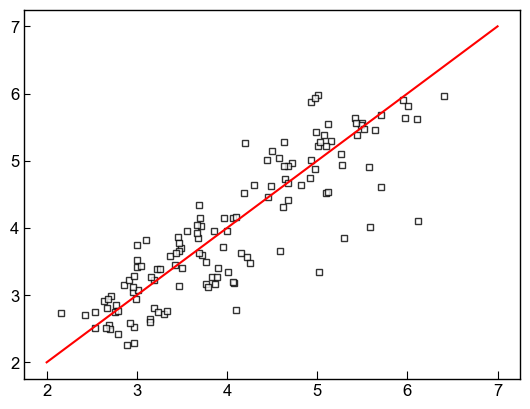

In [36]:
plt.plot(Amp_Glass_Filt['SiO2_Liq']/Amp_Glass_Filt['Al2O3_Liq'], Amp_Chem['SiO2_Eq2_Zhang17']/Amp_Chem['Al2O3_Eq14_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)
plt.plot([2, 7],[2, 7], '-r')
R2_Zhang_Eq9=pt.calculate_R2(Amp_Glass_Filt['SiO2_Liq']/Amp_Glass_Filt['Al2O3_Liq'], Amp_Chem['SiO2_Eq2_Zhang17']/Amp_Chem['Al2O3_Eq14_Zhang17'])
print('Eq 9 Zhang')
print('R2='+str(R2_Zhang_Eq9['R2']))
print('RMSE='+str(R2_Zhang_Eq9['RMSE']))
print('Grad='+str(R2_Zhang_Eq9['Grad']))
print('Int='+str(R2_Zhang_Eq9['Int']))
print('Mean='+str(R2_Zhang_Eq9['Mean']))

In [37]:
len(Cali_Zhang)

130

## Figure for review

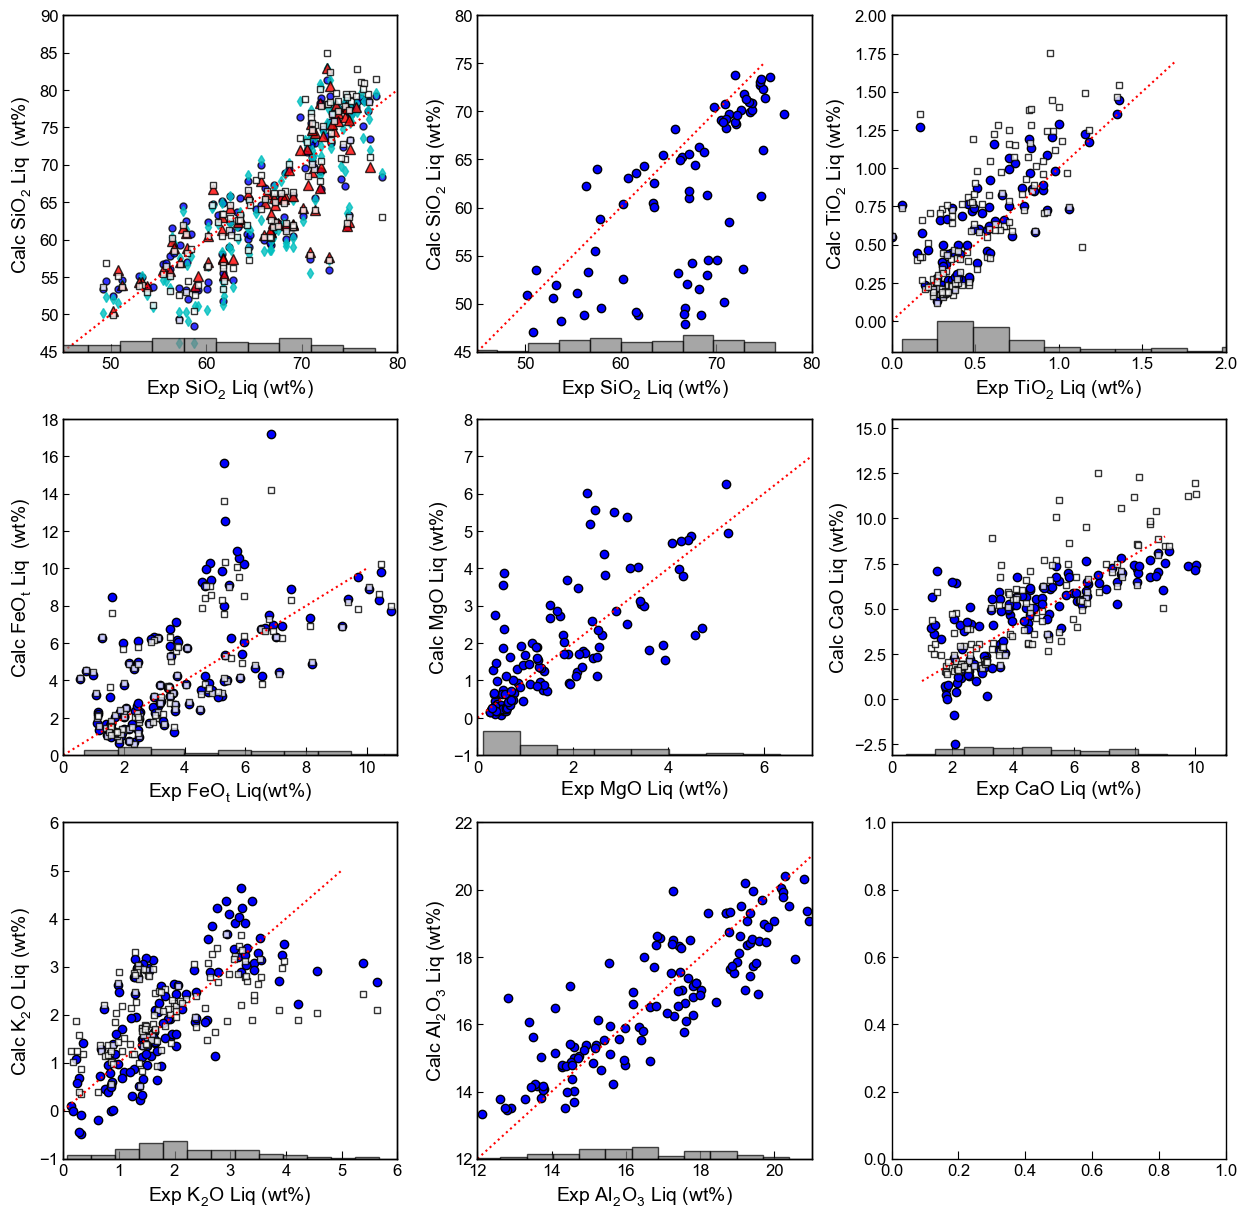

In [38]:
fig, ((ax0, ax01, ax1), (ax2, ax3, ax4), (ax5, ax6, ax7)) = plt.subplots(3,3, figsize = (15,15*0.99)) # adjust dimensions of figure here

bins=13
# No coherent discrepencies
## Histogram
ax0.set_ylim([45, 90])
ax0b=ax0.twinx()
ax0b.hist(Cali_Zhang['SiO2_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax0b.axes.get_yaxis().set_visible(False)
ax0b.set_ylim([0, 1])

ax0.plot(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq1_Zhang17'], 'ok', mfc='blue', ms=5, alpha=0.8)

ax0.plot(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq2_Zhang17'], 'dc', ms=5, alpha=0.8)

ax0.plot(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq3_Zhang17'], '^k', mfc='red', ms=7, alpha=0.8)

ax0.plot(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq4_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)

ax0.set_xlim([45, 80])
ax0b.set_xlim([45, 80])
##########################

ax0.plot([45, 80], [45, 80], ':r')

# ax0.set_xlim([45, 105])

ax0.set_xlabel('Exp SiO$_2$ Liq  (wt%)')
ax0.set_ylabel('Calc SiO$_2$ Liq (wt%)')

## Putirka equations
## Histogram
#ax01.set_ylim([45, 110])
ax01b=ax01.twinx()
ax01b.hist(Cali_Put['SiO2_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax01b.axes.get_yaxis().set_visible(False)
ax01b.set_ylim([0, 1])


ax01.plot(Amp_Glass_Filt['SiO2_Liq'], Amp_Chem['SiO2_Eq10_Put2016'], 'ok', mfc='b',ms=6)
#
ax01.set_xlabel('Exp SiO$_2$ Liq (wt%)')
ax01.set_ylabel('Calc SiO$_2$ Liq (wt%)')

ax01.plot([45, 75], [45, 75], ':r')
ax01.set_ylim([45, 80])
ax01.set_xlim([45, 80])
ax01b.set_xlim([45, 80])
ax0.set_xlabel('Exp SiO$_2$ Liq (wt%)')
ax0.set_ylabel('Calc SiO$_2$ Liq  (wt%)')

# K2O content is the issue here in the amphibole 
## Histogram
ax1.set_ylim([-0.2, 2])
ax1.set_xlim([0, 2])

ax1b=ax1.twinx()
ax1b.hist(Cali_Zhang['TiO2_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=25)
ax1b.axes.get_yaxis().set_visible(False)
ax1b.set_ylim([0, 14])

ax1.set_xlabel('Exp TiO$_2$ Liq (wt%)')
ax1.set_ylabel('Calc TiO$_2$ Liq (wt%)')
ax1.plot(Amp_Glass_Filt['TiO2_Liq'], Amp_Chem['TiO2_Eq5_Zhang17'], 'ok', mfc='b',ms=6)
ax1.plot(Amp_Glass_Filt['TiO2_Liq'], Amp_Chem['TiO2_Eq6_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)
ax1.set_xlim([0, 2])
ax1b.set_xlim([0, 2])
ax1.plot([0, 1.70], [0, 1.70], ':r')

# FeO
## Histogram
ax2b=ax2.twinx()
ax2b.hist(Cali_Zhang['FeOt_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax2b.axes.get_yaxis().set_visible(False)
ax2b.set_ylim([0, 7])

ax2.set_xlabel('Exp FeO$_t$ Liq(wt%)')
ax2.set_ylabel('Calc FeO$_t$ Liq  (wt%)')
ax2.plot(Amp_Glass_Filt['FeOt_Liq'], Amp_Chem['FeO_Eq7_Zhang17'], 'ok', mfc='b',ms=6)
ax2.plot(Amp_Glass_Filt['FeOt_Liq'], Amp_Chem['FeO_Eq8_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)
ax2.plot([0, 10], [0, 10], ':r')
ax2.set_xlim([0, 11])
ax2b.set_xlim([0, 11])
ax2.set_ylim([0, 18])

# MgO
## Histogram
ax3.set_xlim([0, 7])
ax3.set_ylim([0, 7])
ax3b=ax3.twinx()
ax3b.set_xlim([0, 7])
ax3b.hist(Cali_Zhang['MgO_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.set_ylim([0, 7])

ax3.set_xlabel('Exp MgO Liq (wt%)')
ax3.set_ylabel('Calc MgO Liq (wt%)')
ax3.plot(Amp_Glass_Filt['MgO_Liq'], Amp_Chem['MgO_Eq9_Zhang17'], 'ok', mfc='b',ms=6)
ax3.plot([0, 7], [0, 7], ':r')
ax3.set_ylim([-1, 8])


# CaO  eq 10 and 
## Histogram
ax4b=ax4.twinx()
ax4b.hist(Cali_Zhang['CaO_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax4b.axes.get_yaxis().set_visible(False)
ax4b.set_ylim([0, 7])


ax4.set_xlabel('Exp CaO Liq (wt%)')
ax4.set_ylabel('Calc CaO Liq (wt%)')
ax4.plot(Amp_Glass_Filt['CaO_Liq'], Amp_Chem['CaO_Eq10_Zhang17'], 'ok', mfc='b',ms=6)
ax4.plot(Amp_Glass_Filt['CaO_Liq'], Amp_Chem['CaO_Eq11_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)
ax4.plot([1, 9], [1, 9], ':r')
ax4.set_ylim([-3.1, 15.5])
ax4b.set_xlim([0, 11])
ax4.set_xlim([0, 11])

# K2O Eq 12 and 13
ax5b=ax5.twinx()
ax5b.hist(Cali_Zhang['K2O_Liq'], facecolor='grey',  edgecolor='k',density=True, alpha=0.7, bins=bins)
ax5b.axes.get_yaxis().set_visible(False)
ax5b.set_ylim([0, 9])

ax5.set_xlabel('Exp K$_2$O Liq (wt%)')
ax5.set_ylabel('Calc K$_2$O Liq (wt%)')
ax5.plot(Amp_Glass_Filt['K2O_Liq'], Amp_Chem['K2O_Eq12_Zhang17'], 'ok', mfc='b',ms=6)
ax5.plot(Amp_Glass_Filt['K2O_Liq'], Amp_Chem['K2O_Eq13_Zhang17'], 'sk', mfc='white', ms=4, alpha=0.8)
ax5.plot([0, 5], [0, 5], ':r')
ax5.set_ylim([-1, 6])
ax5.set_xlim([0, 6])
ax5b.set_xlim([0, 6])
#ax5b.set_ylim([-0.5, 1.5])
# K2O Eq 12 and 13
ax6.set_xlabel('Exp Al$_2$O$_3$ Liq (wt%)')
ax6.set_ylabel('Calc Al$_2$O$_3$ Liq (wt%)')

ax6.plot(Amp_Glass_Filt['Al2O3_Liq'], Amp_Chem['Al2O3_Eq14_Zhang17'], 'ok', mfc='b',ms=6)
ax6.plot([12, 21], [12, 21], ':r')
ax6.set_ylim([12, 22])
## Histogram
ax6b=ax6.twinx()
ax6b.hist(Cali_Zhang['Al2O3_Liq'], facecolor='grey', edgecolor='k', density=True, alpha=0.7, bins=bins)
ax6b.axes.get_yaxis().set_visible(False)
ax6b.set_ylim([0, 7])
ax6.set_xlim([12, 21])
ax6b.set_xlim([12, 21])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.24, hspace=0.2)
fig.savefig('Chemometer_Assesment.png', dpi=200, transparent=True)